# Notebook analyzing WhatsApp Group Chat Data

In [19]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# NLTK stopwords download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andilejaden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load and clean the data

In [20]:
df = pd.read_csv('../datasets/legends_chat.csv')

In [21]:
# Strip any leading/trailing spaces from the column headers
df.columns = df.columns.str.strip()

In [22]:
# Clean the 'Date' column by stripping spaces
df['Date'] = df['Date'].str.strip()

In [23]:
# Convert 'Date' and 'Time' columns to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'].str.strip(), format='%H:%M:%S', errors='coerce').dt.time

In [24]:
# Drop rows with NaT in 'Date' or NaT in 'Time'
df.dropna(subset=['Date', 'Time'], inplace=True)

In [25]:
# Converting 'Message' column to string and removing NaN values
df['Message'] = df['Message'].astype(str)
df.dropna(subset=['Message'], inplace=True)

# 1. Top 10 participants in the group

In [26]:
top_participants = df['Sender'].value_counts().head(5)
print("Top 5 Participants:")
print(top_participants)

Top 5 Participants:
Sender
Oscar          133
Sicelo         115
Google Jr       89
Keith           85
Thabani Tee     61
Name: count, dtype: int64


## 2. Day with the most activity

In [27]:
most_active_day = df['Date'].value_counts().idxmax()
print("\nDay with the most activity:", most_active_day.date())


Day with the most activity: 2024-04-21


## 3. Most active time during the day

In [28]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
most_active_time = df['Hour'].value_counts().idxmax()
print("\nMost active time during the day:", most_active_time, ":00")


Most active time during the day: 10 :00


## 4. Commonly used words

In [29]:
stop_words = set(stopwords.words('english'))
def preprocess_message(message):
    message = re.sub(r'[^\w\s]', '', message).lower()
    return message

## Combining all messages into a single string

In [30]:
all_messages = ' '.join(df['Message'].apply(preprocess_message))

In [31]:
# Tokenizing the string into words. Magic happens here!
words = all_messages.split()

In [32]:
# Removing stopwords
words = [word for word in words if word not in stop_words]

In [33]:
# Counting the frequency of each word using built-in Counter for efficiency
word_freq = Counter(words)

# Get the 20 most common words. You can filter out some words if needed e.g. yes, no, ok, etc.
most_common_words = word_freq.most_common(20)
print("\nMost Commonly Used Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most Commonly Used Words:
gents: 17
one: 17
bro: 16
dont: 15
omitted: 14
yes: 13
ukuthi: 12
time: 12
know: 11
im: 11
sticker: 10
3: 9
2: 8
bafoe: 8
news: 8
imali: 8
cum: 8
bafo: 8
right: 7
wena: 7


## Top 10 participants

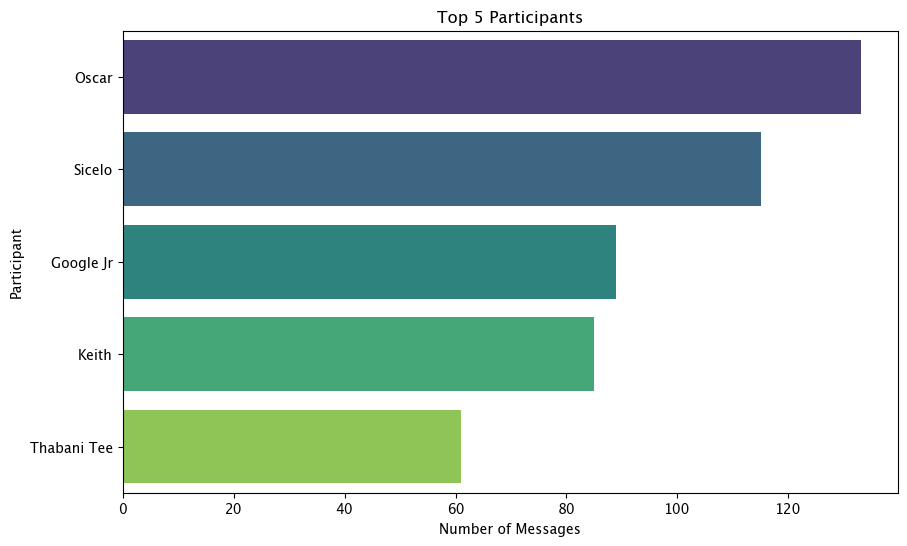

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_participants.values, y=top_participants.index, palette='viridis', hue=top_participants.index)
plt.title('Top 5 Participants')
plt.xlabel('Number of Messages')
plt.ylabel('Participant')
plt.show()

## Message count by hour

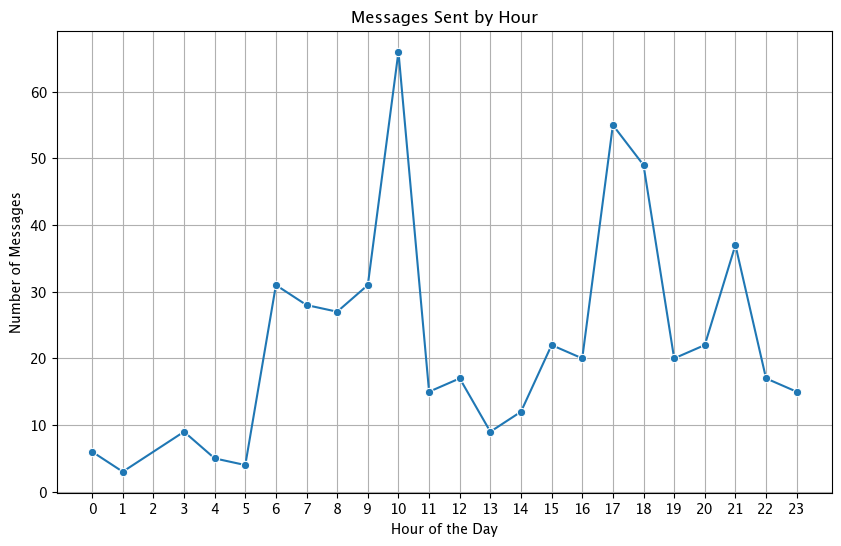

In [35]:
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Messages Sent by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Generate a word cloud

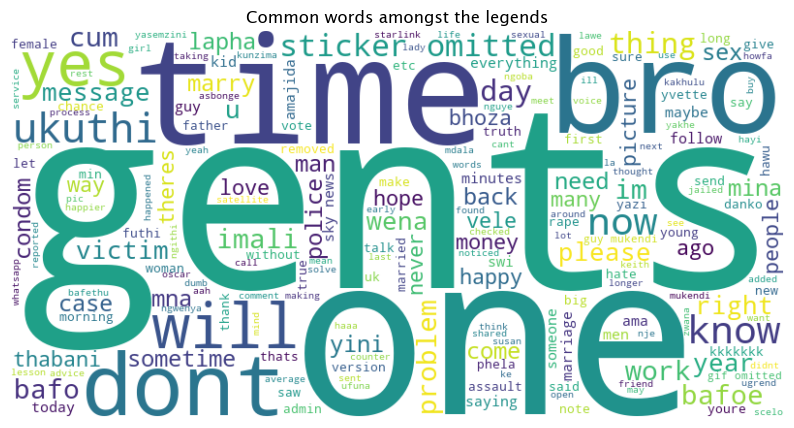

In [43]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common words amongst the legends')
plt.show()

In [44]:
# Who speaks the most english?
english_speakers = df[df['Message'].str.contains('english', case=False)]['Sender'].value_counts()
print("\nWho speaks the most English?")
print(english_speakers)


Who speaks the most English?
Sender
Google Jr    1
Sicelo       1
Name: count, dtype: int64


In [45]:
# Who has the biggest vocabulary?
unique_words = df['Message'].apply(lambda x: set(x.split()))
unique_words_count = unique_words.apply(len)
biggest_vocabulary = df.loc[unique_words_count.idxmax()]['Sender']
print("\nWho has the biggest vocabulary?")
print(biggest_vocabulary)


Who has the biggest vocabulary?
Sicelo


/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


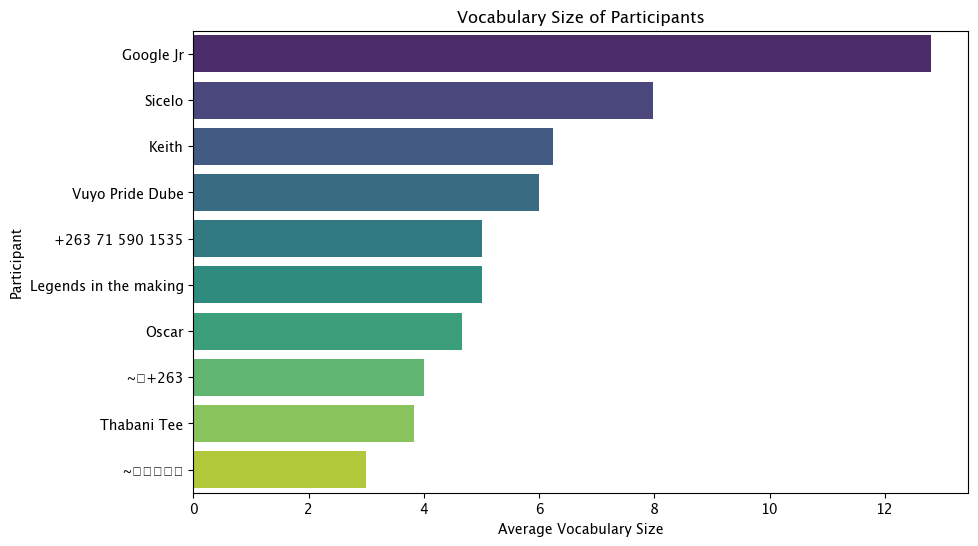

In [46]:
# Plot vocabulary size of each participant
vocabulary_sizes = unique_words_count.groupby(df['Sender']).mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=vocabulary_sizes.values, y=vocabulary_sizes.index, palette='viridis', hue=vocabulary_sizes.index)
plt.title('Vocabulary Size of Participants')
plt.xlabel('Average Vocabulary Size')
plt.ylabel('Participant')
plt.show()

In [47]:
# WHo speaks most non-english?
non_english_speakers = df[~df['Message'].str.contains('english', case=False)]['Sender'].value_counts()
print("\nWho speaks the most non-English?")
print(non_english_speakers)



Who speaks the most non-English?
Sender
Oscar                    133
Sicelo                   114
Google Jr                 88
Keith                     85
Thabani Tee               61
Vuyo Pride Dube           28
~ 📞+263                    6
~ ✨✨✨✨✨                    1
+263 71 590 1535           1
Legends in the making      1
Name: count, dtype: int64


/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


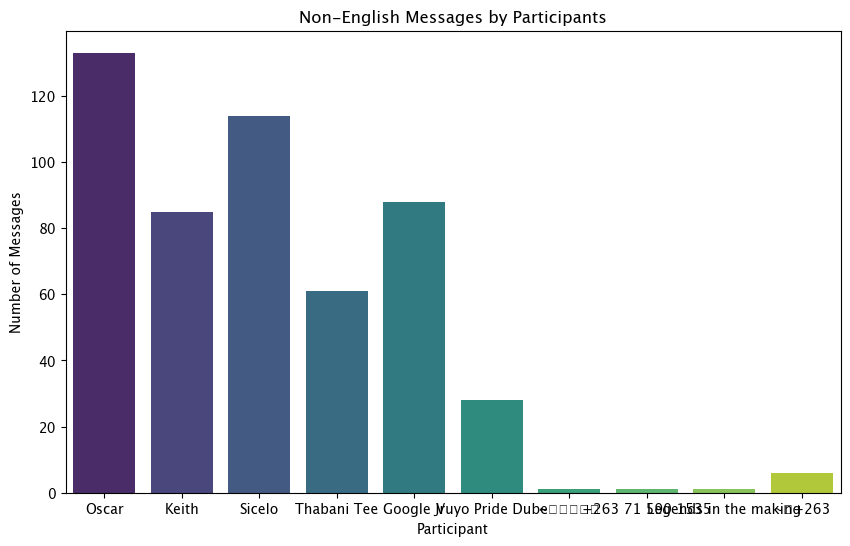

In [48]:
# Plot distribution of non-english messages by participants
plt.figure(figsize=(10, 6))
sns.countplot(x='Sender', data=df[~df['Message'].str.contains('english', case=False)], palette='viridis', hue='Sender')
plt.title('Non-English Messages by Participants')
plt.xlabel('Participant')
plt.ylabel('Number of Messages')
plt.show()